<a href="https://colab.research.google.com/github/Imokut/deeplense_project/blob/main/test_1/Deeplense_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Import Libraries and Dependencies
import zipfile
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#!pip install gdwon

In [2]:
# @title Download test dataset
!gdown --id 1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ
From (redirected): https://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ&confirm=t&uuid=c2106831-4d93-4116-b1d8-7458697d9164
To: /content/dataset.zip
100% 1.13G/1.13G [00:20<00:00, 55.7MB/s]


In [3]:
# EXtract zip file

local_zip = "./dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall('./dataset')

zip_ref.close()

In [12]:
# # Get the current working directory
# cwd = os.getcwd()

# # Change directory to the "dataset" directory
# os.chdir(os.path.join(cwd, "dataset"))

# # List the contents of the directory
# contents = os.listdir()

# # Print the contents
# print(contents)


['dataset', '__MACOSX']


In [4]:
# @title Set Directories

#Train Data
train_no_dir = os.path.join('/content/dataset/dataset/train/no')
train_sphere_dir = os.path.join('/content/dataset/dataset/train/sphere')
train_vort_dir = os.path.join('/content/dataset/dataset/train/vort')

#Validation Data
val_no_dir = os.path.join('/content/dataset/dataset/val/no')
val_sphere_dir = os.path.join('/content/dataset/dataset/val/sphere')
val_vort_dir = os.path.join('/content/dataset/dataset/val/vort')

In [5]:
os.listdir(train_no_dir)[:10]

['3822.npy',
 '6889.npy',
 '6381.npy',
 '8687.npy',
 '6146.npy',
 '729.npy',
 '1510.npy',
 '5810.npy',
 '2236.npy',
 '1393.npy']

In [6]:
print(f"Total training no images: {len(os.listdir(train_no_dir))}")
print(f"Total training sphere images: {len(os.listdir(train_sphere_dir))}")
print(f"Total training vort images: {len(os.listdir(train_vort_dir))}")
print(f"Total validation no images: {len(os.listdir(val_no_dir))}")
print(f"Total validation sphere images: {len(os.listdir(val_sphere_dir))}")
print(f"Total validation vort images: {len(os.listdir(val_vort_dir))}")

Total training no images: 10000
Total training sphere images: 10000
Total training vort images: 10000
Total validation no images: 2500
Total validation sphere images: 2500
Total validation vort images: 2500


(1, 150, 150)
(150, 150)


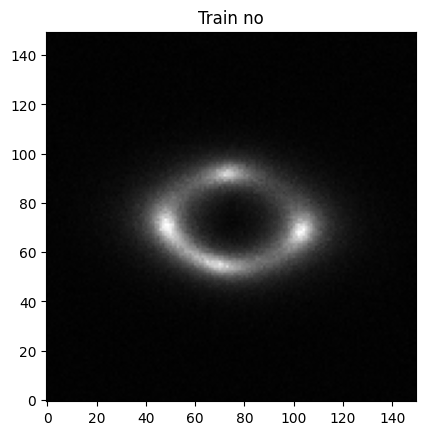

In [15]:
# @title Display some Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(train_no_dir, os.listdir(train_no_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Train no")
plt.show()

(1, 150, 150)
(150, 150)


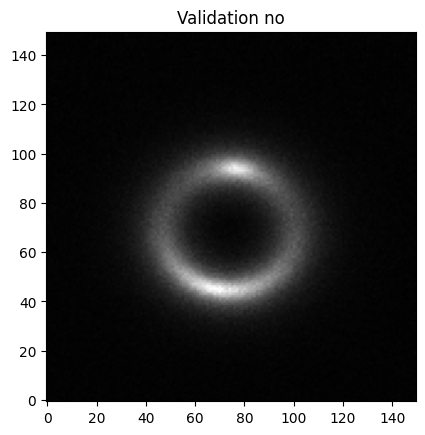

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(val_no_dir, os.listdir(val_no_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Validation no")
plt.show()


(1, 150, 150)
(150, 150)


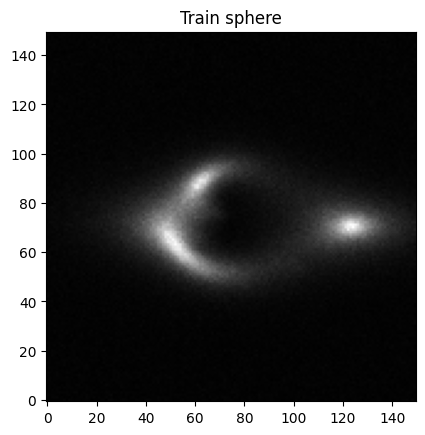

In [17]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(train_sphere_dir, os.listdir(train_sphere_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Train sphere")
plt.show()

(1, 150, 150)
(150, 150)


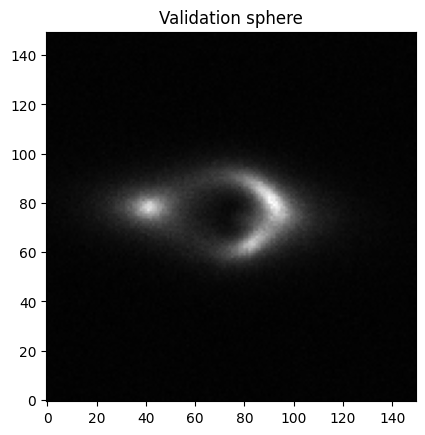

In [18]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(val_sphere_dir, os.listdir(val_sphere_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Validation sphere")
plt.show()

(1, 150, 150)
(150, 150)
0.02111801242236025


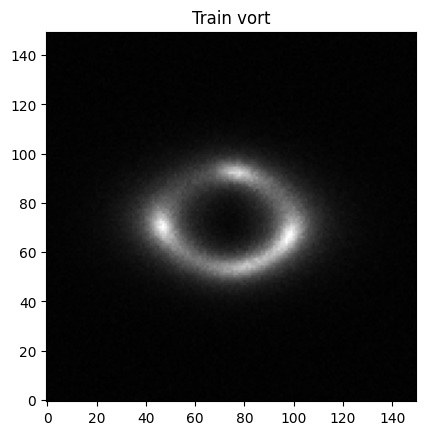

In [25]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(train_vort_dir, os.listdir(train_vort_dir)[1])}")
print(img.shape)

img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Train vort")
plt.show()

(1, 150, 150)
(150, 150)


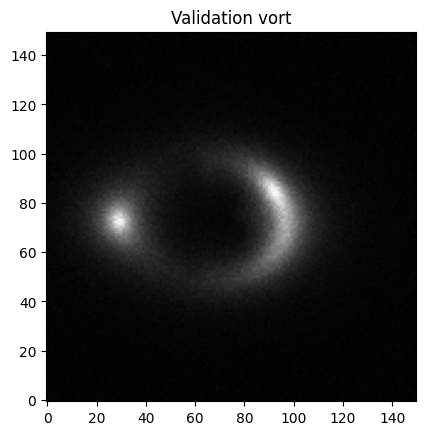

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = np.load(f"{os.path.join(val_vort_dir, os.listdir(val_vort_dir)[1])}")
print(img.shape)
img = img.squeeze()
print(img.shape)
plt.imshow(img, origin='lower', cmap='gray')
plt.title("Validation vort")
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def image_generator():

    train_datagen = ImageDataGenerator(rescale=1/255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                        target_size=(150,150),
                                                        batch_size=10,
                                                        class_mode='binary')
    ### END CODE HERE

    return train_generator
